# Hailey Chung Project 5

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import os 
import sklearn

from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

Below is the code that I wrote for the previous assignment, Project 4, for the California Housing dataset.

In [3]:
# importing cadata.txt into df
filename = os.path.join(os.getcwd(), "cadata.txt")
features = ["median house value", "MedInc", "HouseAge", "total rooms", "total bedrooms", "Population", "households", "Latitude", "Longitude"]
df = pd.read_csv(filename, header = None, names = features, engine = 'python', delim_whitespace = True)
df

,median house value,MedInc,HouseAge,total rooms,total bedrooms,Population,households,Latitude,Longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09
20636,77100.0,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21
20637,92300.0,1.7000,17.0,2254.0,485.0,1007.0,433.0,39.43,-121.22
20638,84700.0,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32


In [4]:
df["AveRooms"] = df["total rooms"] / df["households"]
df["AveBedrms"] = df["total bedrooms"] / df["households"]
df["AveOccup"] = df["Population"] / df["households"]
df.drop(columns = ["total rooms", "total bedrooms", "households"], inplace=True)
df

,median house value,MedInc,HouseAge,Population,Latitude,Longitude,AveRooms,AveBedrms,AveOccup
0,452600.0,8.3252,41.0,322.0,37.88,-122.23,6.984127,1.023810,2.555556
1,358500.0,8.3014,21.0,2401.0,37.86,-122.22,6.238137,0.971880,2.109842
2,352100.0,7.2574,52.0,496.0,37.85,-122.24,8.288136,1.073446,2.802260
3,341300.0,5.6431,52.0,558.0,37.85,-122.25,5.817352,1.073059,2.547945
4,342200.0,3.8462,52.0,565.0,37.85,-122.25,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25.0,845.0,39.48,-121.09,5.045455,1.133333,2.560606
20636,77100.0,2.5568,18.0,356.0,39.49,-121.21,6.114035,1.315789,3.122807
20637,92300.0,1.7000,17.0,1007.0,39.43,-121.22,5.205543,1.120092,2.325635
20638,84700.0,1.8672,18.0,741.0,39.43,-121.32,5.329513,1.171920,2.123209


In [5]:
y = df["median house value"]/100000
X = df.drop(columns = "median house value", inplace = False)
# "We randomly divided the dataset into a training set (80%) and a test set (20%)"
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 723)

In [12]:
# random forest for m = 2
test_error_1 = []
for i in range(0,100):
    model1 = RandomForestRegressor(n_estimators = (i*10)+1, max_features = 2)
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    error = (abs(y_test - y_pred)).mean()
    test_error_1.append(error)

[0.5642814462209297,
 0.3578626008632843,
 0.3523710235557405,
 0.3356982169761197,
 0.33977477234590686,
 0.34377188915488693,
 0.3365318306805188,
 0.3350395354637522,
 0.3368170280947949,
 0.33630174461197715,
 0.33663704908281494,
 0.3335034219393824,
 0.33403183638045414,
 0.33533477986863214,
 0.33020035923154056,
 0.33158806684442294,
 0.3322512083664362,
 0.3330177102458186,
 0.3336331643753491,
 0.33267966619231837,
 0.3339377436099538,
 0.3340914326963704,
 0.3321520763289664,
 0.33231705803886175,
 0.33273184236184983,
 0.3322021404594803,
 0.33526100376087864,
 0.3329958529455931,
 0.3327651496248171,
 0.3327855286169047,
 0.3329812734441409,
 0.33224108665781893,
 0.33346045823371623,
 0.3316335105183969,
 0.33235636848843003,
 0.3334380221446487,
 0.3331874020673617,
 0.3339309347836878,
 0.3323033748334161,
 0.33006341006587303,
 0.3330055843434068,
 0.33190569750938476,
 0.3324494776245648,
 0.33051014491605096,
 0.3325620320547474,
 0.33232411650896354,
 0.332338984181

In [13]:
# random forest for m = 6
test_error_2 = []
for i in range(0,100):
    model2 = RandomForestRegressor(n_estimators = (i*10)+1, max_features = 6)
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)
    error = (abs(y_test - y_pred)).mean()
    test_error_2.append(error)

In [16]:
# xgb model for GBM depth = 4
model3 = xgb.XGBRegressor(max_depth = 4, learning_rate = 0.05, colsample_bytree=0.5, objective = "reg:pseudohubererror", n_estimators = 1000, eval_metric = mean_absolute_error, alpha=0)
model3.fit(X_train, y_train, eval_set = [(X_train, y_train),(X_test, y_test)],verbose=0)
errors3 = model3.evals_result()
test_error_3 = np.array(errors3['validation_1']['mean_absolute_error'])

In [17]:
# xgb model for GBM depth = 6
model4 = xgb.XGBRegressor(max_depth = 6, learning_rate = 0.05, colsample_bytree=0.5, objective = "reg:pseudohubererror", n_estimators = 1000, eval_metric = mean_absolute_error, alpha=0)
model4.fit(X_train, y_train, eval_set = [(X_train, y_train),(X_test, y_test)],verbose=0)
errors4 = model4.evals_result()
test_error_4 = np.array(errors4['validation_1']['mean_absolute_error'])

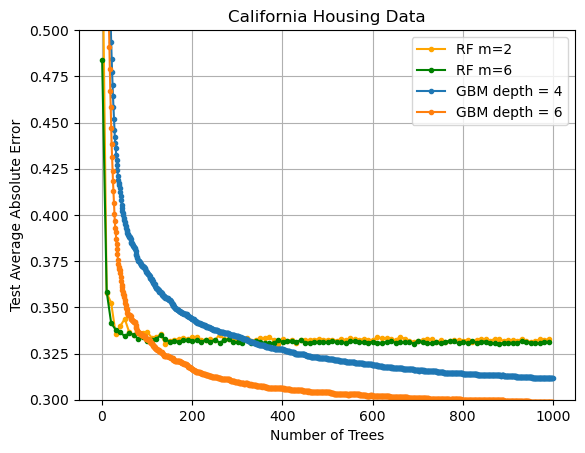

In [39]:
# Replicating Figure 15.3
fig, ax = plt.subplots()
n = np.zeros(100)
for i in range(0,100):
    n[i] = (i*10)+1
ax.plot(n, test_error_1, label = 'RF m=2', color = 'orange', marker = 'o', markersize = 3)
ax.plot(n, test_error_2, label = 'RF m=6', color = 'green', marker = 'o', markersize = 3)
ax.plot(test_error_3, label = 'GBM depth = 4', marker = 'o', markersize = 3)
ax.plot(test_error_4, label = 'GBM depth = 6', marker = 'o', markersize = 3)
ax.set(xlabel='Number of Trees', ylabel='Test Average Absolute Error',title='California Housing Data')
ax.grid()
ax.legend()
plt.ylim([0.3,0.5])
plt.show()

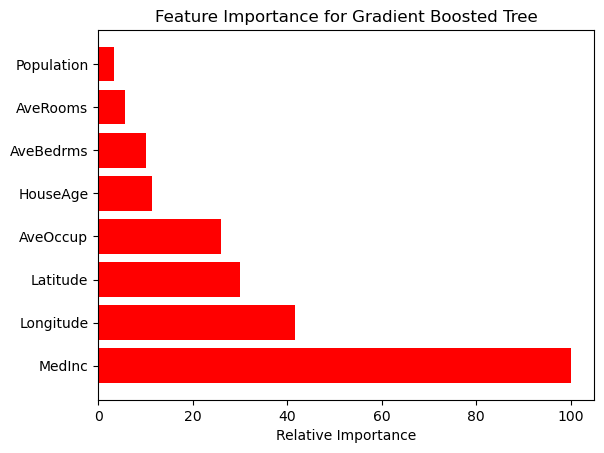

In [42]:
# Feature Importance for Gradient Boosted Tree (GBM depth=4):
index = model3.feature_importances_.argsort()
imp = model3.feature_importances_[index][::-1]
relimp = (imp/max(imp))*100
feats = model3.feature_names_in_[index][::-1]
plt.barh(feats,relimp, color = 'red')
plt.xlabel("Relative Importance")
plt.title("Feature Importance for Gradient Boosted Tree")
plt.show()

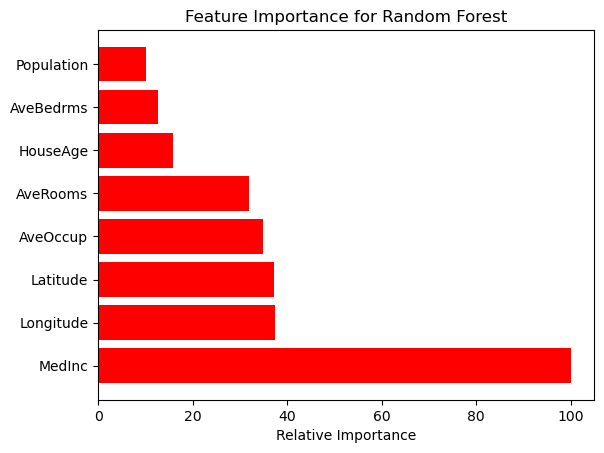

In [41]:
# Feature Importance for Random Forest (RF m=2):
index = model1.feature_importances_.argsort()
imp = model1.feature_importances_[index][::-1]
relimp = (imp/max(imp))*100
feats = model1.feature_names_in_[index][::-1]
plt.barh(feats,relimp, color = 'red')
plt.xlabel("Relative Importance")
plt.title("Feature Importance for Random Forest")
plt.show()